<a href="https://colab.research.google.com/github/Jucicarla/analise-de-sentimento/blob/main/analise_sentimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise de Sentimentos usando TextBlob: Analisar comentários postados por usuários sobre restaurantes.**





#Instalação de pacotes

In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


#Importar pacotes

In [22]:
from textblob import TextBlob
import pandas as pd
import json
# montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
arquivo = '/content/drive/MyDrive/dataset-v2.dat'
d = []
with open(arquivo) as infile:
  for line in infile:
    try:
      item = json.loads(line.strip())
      d.append(item)
    except:
      None

In [9]:
df = pd.DataFrame(d)

In [10]:
df

,title,reviewId,restaurantId,author,reviewBody,language,mobileDevice,userLocation,publicationDate,visitDate,ratingValue,itemReviewed
0,Jantar,692856288,2344932,larinhavercosa222,"Comida maravilhosa, lugar do verdadeiro chicle...",pt,True,"São Carlos, SP",26/07/2019,07/2019,5,"{'name': 'Imperador dos Camarões', 'address': ..."
1,Uma boa experiência.,229208487,3720906,Pano P,"Comida boa, drinks legais e um ambiente bem ac...",pt,True,"Manaus, AM",16/09/2014,None,4,"{'name': 'Guacamole Natal', 'address': {'stree..."
2,Otimo self service,679002332,2248105,Magma100,"Excelente pra ir com a família! Ótima Comida, ...",pt,True,"Goiânia, GO",04/06/2019,07/2018,4,"{'name': 'Chica Pitanga', 'address': {'streetA..."
3,O sorvete mais tradicional do estado,355671519,8168302,Yurie M,Tomo sorvete na Visabor faz mais de 30 anos. S...,pt,False,"Aracaju, SE",15/03/2016,01/2016,5,"{'name': 'Sorvetes Vi Sabor', 'address': {'str..."
4,Melhor hamburger!,268741921,5395141,Debora_C85,O melhor hamburger que já comi! Excelente aten...,pt,False,"Rio de Janeiro, RJ",28/04/2015,04/2015,5,"{'name': 'Z Deli Sandwich Shop', 'address': {'..."
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Nova opção no Paseo!!!,672210394,17424548,Fabiano B,"Ainda não inaugurado oficialmente, está atende...",pt,True,"Porto Alegre, RS",07/05/2019,05/2019,5,"{'name': 'Boteco Maestro', 'address': {'street..."
99996,Bom,380904400,2440184,Chris L,"Bom atendimento, lugar bonito, comida muito go...",pt,True,"Cork, Irlanda",08/06/2016,01/2016,4,"{'name': 'Casa do Marquês', 'address': {'stree..."
99997,Bom bar,186111858,2392996,Guilherme P,O Rio Scenarium é uma das baladas mais famosas...,pt,False,"São Paulo, SP",27/11/2013,11/2013,4,"{'name': 'Rio Scenarium', 'address': {'streetA..."
99998,Me senti enganada...,152745909,1062290,LisianeCohem,"Fui por indicação e com boa expectativa!\n116,...",pt,True,"Porto Alegre, RS",21/02/2013,None,2,"{'name': 'Celeiro', 'address': {'streetAddress..."


In [16]:
df.ratingValue

0        5
1        4
2        4
3        5
4        5
        ..
99995    5
99996    4
99997    4
99998    2
99999    5
Name: ratingValue, Length: 100000, dtype: object

#**Histograma**
## Qual a distribuição das estrelas dos participantes da pesquisa?
## A maioria dos participantes deram conceitos na  faixa entre 3 a 5 estrelas, sendo 5 a mais frequente.

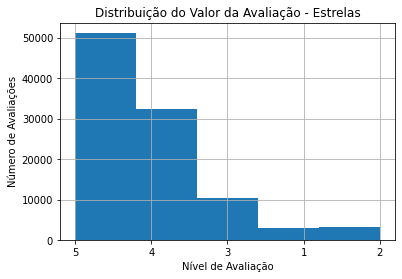

In [29]:
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
df.ratingValue.hist(bins = 5)
plt.xlabel("Nível de Avaliação")
plt.ylabel("Número de Avaliações")
plt.title("Distribuição do Valor da Avaliação - Estrelas")
plt.show()

##**Informações Sobre de onde saiu os comentários:**


In [31]:
lista_demographics = df.loc[:, ["language", "userLocation", "mobileDevice"]]
lista_demographics.head(10)

,language,userLocation,mobileDevice
0,pt,"São Carlos, SP",True
1,pt,"Manaus, AM",True
2,pt,"Goiânia, GO",True
3,pt,"Aracaju, SE",False
4,pt,"Rio de Janeiro, RJ",False
5,pt,None,False
6,pt,"Brasília, DF",True
7,pt,"Vila Velha, ES",False
8,pt,"Teresina, PI",True
9,pt,"Belo Horizonte, MG",False


In [19]:
#lista de todas as colunas
df.columns

Index(['title', 'reviewId', 'restaurantId', 'author', 'reviewBody', 'language',
       'mobileDevice', 'userLocation', 'publicationDate', 'visitDate',
       'ratingValue', 'itemReviewed'],
      dtype='object')

In [24]:
df['userLocation'].value_counts()

Manaus,AM    100000
Name: userLocation, dtype: int64

In [25]:
df.userLocation.describe()

count        100000
unique            1
top       Manaus,AM
freq         100000
Name: userLocation, dtype: object

In [31]:
df.iloc[0]

title                                                        Jantar 
reviewId                                                   692856288
restaurantId                                                 2344932
author                                             larinhavercosa222
reviewBody         Comida maravilhosa, lugar do verdadeiro chicle...
language                                                          pt
mobileDevice                                                    True
userLocation                                               Manaus,AM
publicationDate                                           26/07/2019
visitDate                                                    07/2019
ratingValue                                                        5
itemReviewed       {'name': 'Imperador dos Camarões', 'address': ...
Name: 0, dtype: object

In [8]:
comentario = df.reviewBody

In [9]:
comentario

0        Comida maravilhosa, lugar do verdadeiro chicle...
1        Comida boa, drinks legais e um ambiente bem ac...
2        Excelente pra ir com a família! Ótima Comida, ...
3        Tomo sorvete na Visabor faz mais de 30 anos. S...
4        O melhor hamburger que já comi! Excelente aten...
                               ...                        
99995    Ainda não inaugurado oficialmente, está atende...
99996    Bom atendimento, lugar bonito, comida muito go...
99997    O Rio Scenarium é uma das baladas mais famosas...
99998    Fui por indicação e com boa expectativa!\n116,...
99999    Experiência fantástica com comida deliciosa e ...
Name: reviewBody, Length: 100000, dtype: object

AttributeError: ignored

In [ ]:
comentario

**Visão Geral dos dados: apresenta um resumo com as estatisticas dos dados do dataset**

In [10]:
df.reviewBody

0        Comida maravilhosa, lugar do verdadeiro chicle...
1        Comida boa, drinks legais e um ambiente bem ac...
2        Excelente pra ir com a família! Ótima Comida, ...
3        Tomo sorvete na Visabor faz mais de 30 anos. S...
4        O melhor hamburger que já comi! Excelente aten...
                               ...                        
99995    Ainda não inaugurado oficialmente, está atende...
99996    Bom atendimento, lugar bonito, comida muito go...
99997    O Rio Scenarium é uma das baladas mais famosas...
99998    Fui por indicação e com boa expectativa!\n116,...
99999    Experiência fantástica com comida deliciosa e ...
Name: reviewBody, Length: 100000, dtype: object

#Análise de Sentimentos

Exemplo de comentário

In [27]:
comentario = "Conheço o restaurante em várias cidades do Brasil. O de Manaus não foge muito da qualidade e beleza. Atendimento bom, ambiente bonito. Mas a comida não surpreendeu, aliás até decepcionou. Não foi aquele sabor que estamos acostumados quando vamos a este restaurante. Pode ter sido um fato isolado, mas."

Texto convertido para o formato TextBlob

In [28]:
comentario_blob = TextBlob(comentario)

Comentário traduzido para Inglês (US)

In [29]:
comentario_blob_us = comentario_blob.translate(to='us')

In [30]:
comentario_blob_us

TextBlob("I know the restaurant in several cities in Brazil. The one in Manaus is not far from quality and beauty. Good service, beautiful environment. But the food was not surprising, even disappointed. It was not that flavor we are used to when we go to this restaurant. It may have been an isolated event, but.")

#Cálculo da subjetividade

O valor da subjetividade é um número real entre [0.0, 1.0], onde 0.0 o texto é indicado como muito objetivo e 1.0 o texto é indicado como muito subjetivo.

In [ ]:
for sentence_br, sentence in zip(comentario_blob.sentences, comentario_blob_us.sentences):
    print(sentence_br, ':', sentence.sentiment.subjectivity)

Conheço o restaurante em várias cidades do Brasil. : 0.0
O de Manaus não foge muito da qualidade e beleza. : 1.0
Atendimento bom, ambiente bonito. : 0.8
Mas a comida não surpreendeu, aliás até decepcionou. : 0.625
Não foi aquele sabor que estamos acostumados quando vamos a este restaurante. : 0.0
Pode ter sido um fato isolado, mas. : 0.0


#Cálculo da polaridade

O valor da polaridade é um número real entre os valores [-1.0, 1.0].

In [ ]:
for sentence_br, sentence in zip(comentario_blob.sentences, comentario_blob_us.sentences):
    print(sentence_br, ':', sentence.sentiment.polarity)

Conheço o restaurante em várias cidades do Brasil. : 0.0
O de Manaus não foge muito da qualidade e beleza. : -0.05
Atendimento bom, ambiente bonito. : 0.7749999999999999
Mas a comida não surpreendeu, aliás até decepcionou. : -0.55
Não foi aquele sabor que estamos acostumados quando vamos a este restaurante. : 0.0
Pode ter sido um fato isolado, mas. : 0.0


#**Visão Temporal**

#**Visão Geográfica**